# CS189: Introduction to Machine Learning


---
### Homework 4 / SID : 23274190 / Name: Hye Soo Choi

---
## Problem 1:   Ridge Regression

In this problem we will return to predicting the median home value in a given Census area by
extending linear regression. The data is in housing data.mat and it comes from
[ftp://rcom.univie.ac.at/mirrors/lib.stat.cmu.edu/datasets/.index.html](ftp://rcom.univie.ac.at/mirrors/lib.stat.cmu.edu/datasets/.index.html)
. There are only
8 features for each data point; you can read about the features in housing data source.txt.

### 1a)

In order to find the optimizer of the loss function $J(w, \alpha)$, we need to differentiate the loss function $J(w, \alpha)$ and find the local minima. Before differentiating the loss function $J(w, \alpha)$, let us expand the mathematical expression to facilitate calcuations. 

\begin{align*}
J(w, \alpha) & = (Xw + \alpha 1 - y)^\top (Xw + \alpha 1 - y) + \lambda w^\top w \\
             & = (w^\top X^\top + \alpha 1^\top - y^\top)(Xw + \alpha 1 - y) + \lambda w^\top w \\
             & = w^\top X^\top Xw + \alpha w^\top X^\top 1 - w^\top X^\top y +
                 \alpha 1^\top Xw + \alpha^2 n - \alpha 1^\top y +
                 -y^\top Xw - y^\top \alpha 1 + y^\top y
                 + \lambda w^\top w \\
             & = w^\top X^\top Xw  - w^\top X^\top y +
                  \alpha n - \alpha 1^\top y +
                 -y^\top Xw - y^\top \alpha 1 + y^\top y 
                 \lambda w^\top w (\, \because \, \,  X^\top 1 = 1^\top X = 0)
\end{align*}


If we differentiate the loss function $J(w, \alpha)$ by w, then 
$$\frac{\partial J}{\partial w} = 2 X^\top Xw - 2 X^\top y  + 2\lambda w.$$
Therefore, 
$$
\frac{\partial J}{\partial w} = 2 X^\top Xw - 2 X^\top y  + 2\lambda w= 0
$$
gives $\hat{w} = (X^\top X + \lambda I)^{-1} X^\top y.$

If we differentiate the loss function $J(w, \alpha)$ by $\alpha$, then
we get
$$\frac{\partial J}{\partial \alpha} = 2\alpha n - 2 1^\top y.$$
In order for $\frac{\partial J}{\partial \alpha}$ to be $0$,
it should be that $\hat{\alpha} = \bar{y}.$


### 1b)

In [2]:
import scipy.io as sio
import numpy as np

housing_data = sio.loadmat('./housing_dataset/housing_data.mat')

In [28]:
housing_xtrain = housing_data['Xtrain']
housing_ytrain = housing_data['Ytrain'][:,0]
housing_xvalid = housing_data['Xvalidate']
housing_yvalid = housing_data['Yvalidate'][:,0]

In [46]:
center_housing_xtrain.shape

(19440, 8)

In [19]:
# center the feature values of the training and validation data.

center_housing_xtrain = housing_xtrain - np.expand_dims(np.mean(housing_xtrain, axis = 0), axis = 0)
center_housing_xvalid = housing_xvalid - np.expand_dims(np.mean(housing_xvalid, axis = 0), axis = 0)

In [23]:
np.sum(center_housing_xvalid, axis=0)

array([  4.19220214e-13,  -2.70006240e-13,  -9.45874490e-11,
        -1.90993887e-11,  -8.36735126e-11,   2.91038305e-11,
         2.77111667e-13,  -2.55795385e-13])

In [5]:
from numpy.linalg import inv

In [64]:
# Implement ridge regression for (i)
def ridge_regression (X, y, lamda):
    w = np.dot(inv(np.dot(np.transpose(X), X) + (lamda * np.identity(8))), 
              np.dot(np.transpose(X), y))
    alpha = np.mean(y)
    return [w, alpha]
    


In [6]:
# Implement 10-fold Cross-Validation, using the ridge_regression implemented above.


from sklearn.cross_validation import KFold
kf = KFold(19440, n_folds=10)

def tenfold_cv(lamda):
    RSS = 0
    for train_index, test_index in kf:
        X_train, X_test = center_housing_xtrain[train_index, :], center_housing_xtrain[test_index, :]
        y_train, y_test = housing_ytrain[train_index], housing_ytrain[test_index]
        ridge = ridge_regression(X_train, y_train, lamda)
        w = ridge[0]
        alpha = ridge[1]
        one = np.linspace(1,1,len(y_test))
        temp = (np.dot(X_test, w) + (alpha * np.transpose(one)) - y_test )
        RSS = RSS + np.dot(np.transpose(temp), temp)
    return RSS/10
                             

In [88]:
tenfold_cv(1e-12)

9425875042980.4492

In [89]:
tenfold_cv(1e-5)

9425875042967.5977

In [90]:
tenfold_cv(1e-4)

9425875042851.9395

In [91]:
tenfold_cv(1e-3)

9425875041695.3809

In [92]:
tenfold_cv(1e-2)

9425875030137.1055

In [93]:
tenfold_cv(1e-1)

9425874915283.6348

In [94]:
tenfold_cv(1)

9425873839646.3105

In [95]:
tenfold_cv(10)

9425870341696.4805

In [96]:
tenfold_cv(100)

9426530937596.7383

In [97]:
tenfold_cv(1000)

9480399010571.4824

In [98]:
tenfold_cv(5)

9425870659168.0137

In [99]:
tenfold_cv(20)

9425881801097.7461

In [100]:
tenfold_cv(12)

9425871347405.1973

In [101]:
tenfold_cv(8)

9425869982405.9648

In [102]:
tenfold_cv(7)

9425870045690.5527

In [103]:
tenfold_cv(9)

9425870081144.416

Average RSS on different tuned lambda valuse is given as follows:


| Lambda        | average RSS        |
| ------------- |:------------------:| 
| 1e-12         | 9425875042980.4492 | 
| 1e-5          | 9425875042967.5977 | 
| 1e-4          | 9425875042851.9395 |
| 1e-3          | 9425875041695.3809 | 
| 1e-2          | 9425875030137.1055 | 
| 1e-1          | 9425874915283.6348 |
| 1             | 9425873839646.3105 | 
| 5             | 9425870659168.0137 | 
| 7             | 9425870045690.5527 | 
| 8             | 9425869982405.9648 |
| 9             | 9425870081144.416  | 
| 10            | 9425870341696.4805 | 
| 12            | 9425871347405.1973 |
| 20            | 9425881801097.7461 | 
| 100           | 9426530937596.7383 |  
| 1000          | 9480399010571.4824 |

It is when $\lambda =8$ that ridge regression with least squares achives the lowest average RSS throughout 10-fold cross validation.


In [109]:
# RSS on validation data with the lambda 8 with the lowest cross-validation error.


ridge = ridge_regression(center_housing_xtrain, housing_ytrain, 8)
w = ridge[0]
alpha = ridge[1]
one = np.linspace(1,1,len(housing_yvalid))
temp = (np.dot(center_housing_xvalid, w) + (alpha * np.transpose(one)) - housing_yvalid )
RSS = np.dot(np.transpose(temp), temp)

In [110]:
RSS

5782552884504.541

When we train ridge regression with lambda of 8, RSS on validation data is given as 5782552884504.541. Compared to 
5794953797654.9834, RSS of linear regression in HW3, the ridge regression exhibits lower RSS and therefore fits better to the validation data than the linear regression does.

In [111]:
w

array([  4.05915089e+04,   1.19668415e+03,  -8.50719390e+00,
         1.18261856e+02,  -3.77927882e+01,   4.32070327e+01,
        -4.21178034e+04,  -4.23914057e+04])

In [115]:
beta = np.array([ 4.05879986e+04, 1.19561189e+03, -8.50145688e+00,
1.18352188e+02, -3.77900280e+01, 4.30562637e+01,
-4.21794075e+04, -4.24573474e+04])

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

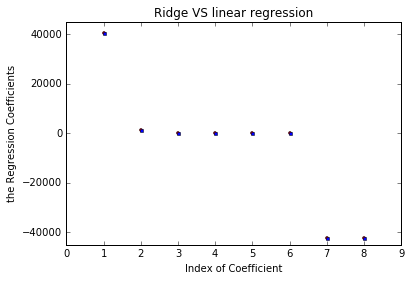

In [124]:

xpos = np.arange(len(w))+ 1
plt.axis([0,9, -45000, 45000])
plt.plot(xpos, w, 'ro', ms = 3)
plt.plot(xpos, beta, 'bs', ms =3)
plt.xlabel('Index of Coefficient')
plt.ylabel('the Regression Coefficients')
plt.title('Ridge VS linear regression')
plt.show()

We plot the regression coefficents of 8 feature in both ridge regression and linear regression in HW3. This plot shows that the maxmimum absolute value of the regression coefficients is slightly smaller in the ridge regression than in the linear regression, as we could expected. Since we impose penalty on large norm of regression coefficient vector in ridge regression, the ridge regression tends to have smaller absolute value of regression coefficients.  

## Problem 2 : Logistic Regression



In [131]:
X = np.array([[0,3,1],[1,3,1],[0,1,1],[1,1,1]])
y = np.transpose(np.array([1,1,0,0]))
1/(np.array([1,2,3]) + 1)

array([ 0.5       ,  0.33333333,  0.25      ])

In [8]:
# Implement the logistic function
def s(gamma):
    return 1/(1+ np.exp(- gamma))

# Implement the logistic loss, aka the cross-entropy loss.
def R(w,X,y):
    temp = np.dot(X,w)
    one = np.linspace(1,1, len(y))
    return np.dot(np.transpose(1- y),temp) + np.dot(one, np.log(1+ np.exp(-temp)))
    
    #return - np.dot(np.transpose(y) ,np.log(s(np.dot(X, w)))) - np.dot(np.transpose(1-y), np.log(1- s(np.dot(X, w))))

def batch_gradient(w,X,y,e):
    return w + e* np.dot(np.transpose(y- s(np.dot(X, w))), X)


In [266]:
w0 = np.transpose(np.array([-2,1,0]))

In [269]:
R(w0, X, y)

1.9883724141284105

In [219]:
mu0 = s(np.dot(X,w0))
mu0

array([ 0.95257413,  0.73105858,  0.73105858,  0.26894142])

In [220]:
w1 = batch_gradient(w0, X, y, 1)
w1

array([-2.        ,  0.94910188, -0.68363271])

In [221]:
mu1 = s(np.dot(X,w1))
mu1

array([ 0.89693957,  0.54082713,  0.56598026,  0.15000896])

In [222]:
w2 = batch_gradient(w1, X, y, 1)
w2

array([-1.69083609,  1.91981257, -0.83738862])

In [271]:
R(w2, X, y)

1.8546997847922486

All things considered, 
 * the value of $R(w_0)$ is 1.9883724141284105, 
 * the value of $\mu_0$ is ( 0.95257413,  0.73105858,  0.73105858,  0.26894142), 
 * the value of $w_1$ is $[-2.        ,\,  0.94910188, -0.68363271]^\top$,
 * the value of $\mu_1$ is (0.89693957,  0.54082713,  0.56598026,  0.15000896),
 * the value of $w_2$ is $[-1.69083609,  1.91981257, -0.83738862]^\top$,
 * the value of $R(w_2)$ is 1.8546997847922486.

## Problem 3: Spam classification using Logistic Regression

The spam dataset given as part of the homework in spam.mat consists of 5172 email
messages, from which 32 features have been extracted. Please use the standard features for
the first four parts of this problem. In part 5, we are asked to predict the labels of the test set in
test.mat and submit the predictions to Kaggle. Feel free to use your own featurizes to boost up
your score!
One can imagine performing several kinds of preprocessing to this data matrix. Try each of the
following separately:

1. Standardize each column to have mean 0 and unit variance.
2. Transform the features using $X_{ij} \mapsto  \log(X_{ij}+0.1)$, where the $X_{ij}$ 's are the entries of the design matrix.
3. Binarize the features using $X_{ij} \mapsto   I(X_{ij} > 0)$. $I$ denotes an indicator variable.

In [21]:
# import the data

spam_data = sio.loadmat('./spam_dataset/spam_data.mat')
sp_test = spam_data['test_data']
sp_xtrain = spam_data['training_data']
sp_ytrain = spam_data['training_labels'][0,]
sp_test = np.hstack((sp_test, np.expand_dims(np.transpose(np.linspace(1,1, sp_test.shape[0])), axis = 1)))

#### Preprocessing

* Standardize each column to have mean 0 and unit variance.

In [22]:
# Standardize each column to have mean 0 and unit variance.
col_mean = np.mean(sp_xtrain, axis=0)
col_std = np.std(sp_xtrain, axis = 0)

sp_xtrain1 = (sp_xtrain - np.expand_dims(col_mean,axis = 0))/np.expand_dims(col_std, axis = 0)
sp_xtrain1 = np.hstack((sp_xtrain1, np.expand_dims(np.transpose(np.linspace(1,1, sp_xtrain1.shape[0])), axis = 1)))

 * Transform the features using $X_{ij} \mapsto  \log(X_{ij}+0.1)$, where the $X_{ij}$ 's are the entries of the design matrix.

In [23]:
sp_xtrain2 = np.log(sp_xtrain + 0.1)
sp_xtrain2 = np.hstack((sp_xtrain2, np.expand_dims(np.transpose(np.linspace(1,1, sp_xtrain2.shape[0])), axis = 1)))

* Binarize the features using $X_{ij} \mapsto   I(X_{ij} > 0)$. $I$ denotes an indicator variable.

In [24]:
sp_xtrain3 = (sp_xtrain > 0) * 1
sp_xtrain3 = np.hstack((sp_xtrain3, np.expand_dims(np.transpose(np.linspace(1,1, sp_xtrain3.shape[0])), axis = 1)))

#### Batch Gradient Descent

We run the batch gradient method with learning rate $10^{-3}$ for the first preprocessing data.

In [25]:
w_0 = np.transpose(np.zeros(sp_xtrain1.shape[1]))

In [26]:
def logistic_with_batch_gradient(w,X,y,e,n):
    w_temp = w
    risk = []
    for i in np.arange(n):
        risk_temp = R(w_temp,X,y)
        print ('the risk is ', risk_temp ,': iteration ', (i+1))
        w_temp = batch_gradient(w_temp, X, y, e)
        risk = risk + [risk_temp]
    return [risk, w_temp]
    

In [27]:
empirical_risk1 = logistic_with_batch_gradient(w_0, sp_xtrain1, sp_ytrain, 1e-3, 2000)

the risk is  3584.95721786 : iteration  1
the risk is  2387.22054291 : iteration  2
the risk is  2228.25903423 : iteration  3
the risk is  2202.00609786 : iteration  4
the risk is  2184.67717818 : iteration  5
the risk is  2171.56129252 : iteration  6
the risk is  2161.02106254 : iteration  7
the risk is  2152.25131949 : iteration  8
the risk is  2144.779402 : iteration  9
the risk is  2138.29922082 : iteration  10
the risk is  2132.59971606 : iteration  11
the risk is  2127.52901278 : iteration  12
the risk is  2122.97444877 : iteration  13
the risk is  2118.85047442 : iteration  14
the risk is  2115.09083712 : iteration  15
the risk is  2111.64331447 : iteration  16
the risk is  2108.46606985 : iteration  17
the risk is  2105.52508458 : iteration  18
the risk is  2102.79232081 : iteration  19
the risk is  2100.24438769 : iteration  20
the risk is  2097.86155833 : iteration  21
the risk is  2095.62703447 : iteration  22
the risk is  2093.52638815 : iteration  23
the risk is  2091.5471

2000 iterations lower the trainig risk down to 2008.9034413. 
We plot the training risk (the empirical risk of the training set) vs. the number of iterations.

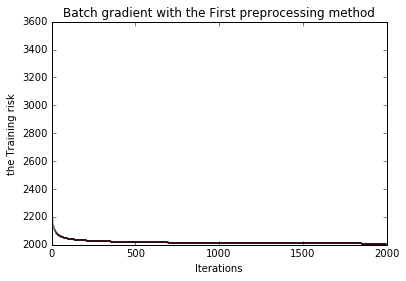

In [28]:
xpos = np.arange(len(empirical_risk1[0]))+ 1
plt.plot(xpos, empirical_risk1[0], 'ro', ms =0.4)
plt.xlabel('Iterations')
plt.ylabel('the Training risk')
plt.title('Batch gradient with the First preprocessing method')
plt.show()

We run the batch gradient method with learning rate $10^{−5}$ for the second preprocessing data.

In [29]:
empirical_risk2 = logistic_with_batch_gradient(w_0, sp_xtrain2, sp_ytrain, 1e-5, 2000)

the risk is  3584.95721786 : iteration  1
the risk is  3297.42549882 : iteration  2
the risk is  3062.14542981 : iteration  3
the risk is  3017.58606369 : iteration  4
the risk is  2983.2229002 : iteration  5
the risk is  2954.59019699 : iteration  6
the risk is  2928.11948285 : iteration  7
the risk is  2903.12739095 : iteration  8
the risk is  2879.32569929 : iteration  9
the risk is  2856.59869658 : iteration  10
the risk is  2834.87595794 : iteration  11
the risk is  2814.10140317 : iteration  12
the risk is  2794.22548882 : iteration  13
the risk is  2775.20178215 : iteration  14
the risk is  2756.98658009 : iteration  15
the risk is  2739.53842088 : iteration  16
the risk is  2722.81804465 : iteration  17
the risk is  2706.78824526 : iteration  18
the risk is  2691.41380139 : iteration  19
the risk is  2676.66137714 : iteration  20
the risk is  2662.49943896 : iteration  21
the risk is  2648.8981665 : iteration  22
the risk is  2635.8293684 : iteration  23
the risk is  2623.26639

After 2000 iterations, the training risk decreases down to 1922.45047124, which is lower than what the first preprocessing method achieved. We plot the training risk over the number of iterations.

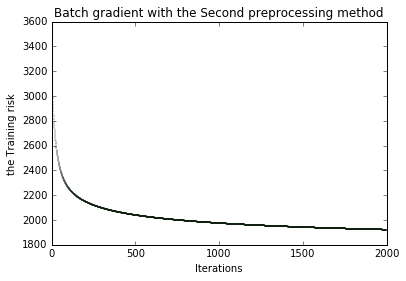

In [30]:
xpos = np.arange(len(empirical_risk2[0]))+ 1
plt.plot(xpos, empirical_risk2[0], 'go', ms = 0.4)
plt.xlabel('Iterations')
plt.ylabel('the Training risk')
plt.title('Batch gradient with the Second preprocessing method')
plt.show()

We run the batch gradient method with learning rate $2*10^{−3}$ for the third preprocessing data.

In [31]:
empirical_risk3 = logistic_with_batch_gradient(w_0, sp_xtrain3, sp_ytrain, 2e-3, 2000)

the risk is  3584.95721786 : iteration  1
the risk is  4106.32058967 : iteration  2
the risk is  3197.9220317 : iteration  3
the risk is  3967.10472524 : iteration  4
the risk is  2682.77707914 : iteration  5
the risk is  2754.18057516 : iteration  6
the risk is  2463.95894291 : iteration  7
the risk is  2417.07294157 : iteration  8
the risk is  2271.68299745 : iteration  9
the risk is  2223.3775302 : iteration  10
the risk is  2155.00067837 : iteration  11
the risk is  2123.86911517 : iteration  12
the risk is  2089.30249473 : iteration  13
the risk is  2069.74877244 : iteration  14
the risk is  2050.14159893 : iteration  15
the risk is  2037.07824844 : iteration  16
the risk is  2024.64782528 : iteration  17
the risk is  2015.31136188 : iteration  18
the risk is  2006.66649052 : iteration  19
the risk is  1999.60404597 : iteration  20
the risk is  1993.12895398 : iteration  21
the risk is  1987.52734896 : iteration  22
the risk is  1982.38003115 : iteration  23
the risk is  1977.7524

After 2000 iterations, the training risk decreases down to 1820.95941468, which is the lowest among the three preprocessing method. We plot the training risk over the number of iterations.

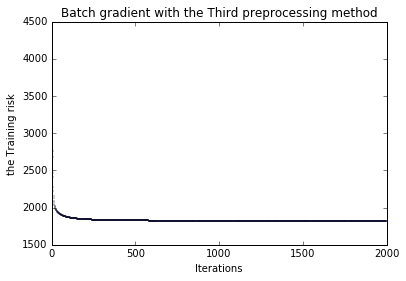

In [32]:
xpos = np.arange(len(empirical_risk3[0]))+ 1
plt.plot(xpos, empirical_risk3[0], 'bo', ms =0.4)
plt.xlabel('Iterations')
plt.ylabel('the Training risk')
plt.title('Batch gradient with the Third preprocessing method')
plt.show()

#### Stochastic Gradient Descent 

In [3]:
import numpy.random as nr

In [342]:
def logistic_with_stochastic_gradient(w,X,y,e,n):
    w_temp = w
    risk = []
    nr.seed(0)
    indice = nr.choice(X.shape[0], n, replace =True)
    for i in np.arange(n):
        risk_temp = R(w_temp,X,y)
        j = indice[i]
        print ('the risk is ', risk_temp ,': iteration ', (i+1))
        w_temp = w_temp + e* (y[j]- s(np.dot(X[j,], w_temp)))* X[j,]
        risk = risk + [risk_temp]
    return risk

We run the stochastic gradient descent with learning rate $10^{-2}$ on the first preprocessed data.

In [349]:
training_risk1 = logistic_with_stochastic_gradient(w_0,sp_xtrain1,sp_ytrain,1e-2,3000)

the risk is  3584.95721786 : iteration  1
the risk is  3577.18569409 : iteration  2
the risk is  3569.54942435 : iteration  3
the risk is  3557.08974585 : iteration  4
the risk is  3549.43081846 : iteration  5
the risk is  3545.22638536 : iteration  6
the risk is  3544.27684629 : iteration  7
the risk is  3534.37127469 : iteration  8
the risk is  3521.67164286 : iteration  9
the risk is  3512.63615729 : iteration  10
the risk is  3518.75145277 : iteration  11
the risk is  3511.14625084 : iteration  12
the risk is  3516.26246308 : iteration  13
the risk is  3508.58262118 : iteration  14
the risk is  3500.66896103 : iteration  15
the risk is  3493.09239735 : iteration  16
the risk is  3500.97145271 : iteration  17
the risk is  3493.3863881 : iteration  18
the risk is  3482.51558683 : iteration  19
the risk is  3472.46802122 : iteration  20
the risk is  3466.59259916 : iteration  21
the risk is  3457.72090377 : iteration  22
the risk is  3450.35180496 : iteration  23
the risk is  3443.118

In [380]:
np.amin(training_risk1)

2201.0702252575302

The training risk decreases down to 2206.8646236 after 3000 iterations and the smallest risk we obtained is 2201.0702252575302. We plot the training risk over the number of iterations.

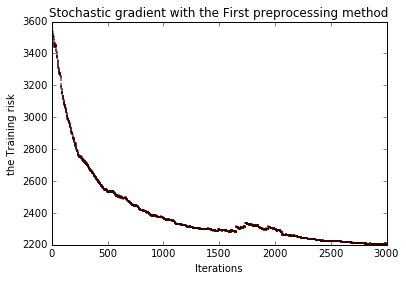

In [379]:
xpos = np.arange(len(training_risk1))+ 1
plt.plot(xpos, training_risk1, 'ro', ms =1)
plt.xlabel('Iterations')
plt.ylabel('the Training risk')
plt.title('Stochastic gradient with the First preprocessing method')
plt.show()

We run stochastic gradient descent on the second preprocessed data with learning rate $6*10^{-3}$.

In [374]:
training_risk2 = logistic_with_stochastic_gradient(w_0,sp_xtrain2,sp_ytrain,6e-3,3000)

the risk is  3584.95721786 : iteration  1
the risk is  3212.15851585 : iteration  2
the risk is  3103.95591907 : iteration  3
the risk is  3100.14270579 : iteration  4
the risk is  3162.06581537 : iteration  5
the risk is  3254.15187477 : iteration  6
the risk is  3352.29449397 : iteration  7
the risk is  3062.88300343 : iteration  8
the risk is  3103.98918932 : iteration  9
the risk is  3166.53726792 : iteration  10
the risk is  3075.5836251 : iteration  11
the risk is  3040.81037176 : iteration  12
the risk is  3075.65130709 : iteration  13
the risk is  3152.06946332 : iteration  14
the risk is  3244.78102454 : iteration  15
the risk is  3335.65849333 : iteration  16
the risk is  3034.76868602 : iteration  17
the risk is  3063.65335317 : iteration  18
the risk is  3125.60909426 : iteration  19
the risk is  3203.31187791 : iteration  20
the risk is  3315.23172421 : iteration  21
the risk is  3420.23836054 : iteration  22
the risk is  3515.86146489 : iteration  23
the risk is  3607.811

In [376]:
np.amin(training_risk2)

2080.0943692828496

After 3000 iteration, the minimum of the training risk we obtained is 2080.0943692828496. We plot the training risk over the number of iterations.

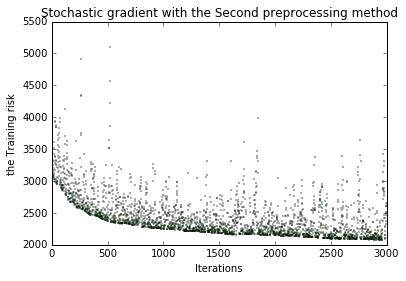

In [378]:
xpos = np.arange(len(training_risk2))+ 1
plt.plot(xpos, training_risk2, 'go', ms =0.7)
plt.xlabel('Iterations')
plt.ylabel('the Training risk')
plt.title('Stochastic gradient with the Second preprocessing method')
plt.show()

We run the stochastic gradient descent with learning rate 0.25 on the third processed data.

In [390]:
training_risk3 = logistic_with_stochastic_gradient(w_0,sp_xtrain3,sp_ytrain,0.25,3000)

the risk is  3584.95721786 : iteration  1
the risk is  3394.71136248 : iteration  2
the risk is  3263.56439499 : iteration  3
the risk is  3129.83593449 : iteration  4
the risk is  3089.03695845 : iteration  5
the risk is  3100.90012712 : iteration  6
the risk is  3111.33958571 : iteration  7
the risk is  3044.64391972 : iteration  8
the risk is  3015.83446442 : iteration  9
the risk is  2991.23852658 : iteration  10
the risk is  2965.75960176 : iteration  11
the risk is  2938.28772864 : iteration  12
the risk is  2930.71554253 : iteration  13
the risk is  2930.45087266 : iteration  14
the risk is  2945.32956975 : iteration  15
the risk is  2956.45146553 : iteration  16
the risk is  2934.0856023 : iteration  17
the risk is  2939.24274221 : iteration  18
the risk is  2940.29889591 : iteration  19
the risk is  2945.61102809 : iteration  20
the risk is  3011.94146395 : iteration  21
the risk is  3039.28955428 : iteration  22
the risk is  3071.4877794 : iteration  23
the risk is  3105.9804

In [391]:
np.amin(training_risk3)

1928.7904915537711

After 3000 iterations, the training risk decreases down to 2065.03700687 and the smallest risk we obtained is 1928.7904915537711. We plot the training risk over the number of iterations.

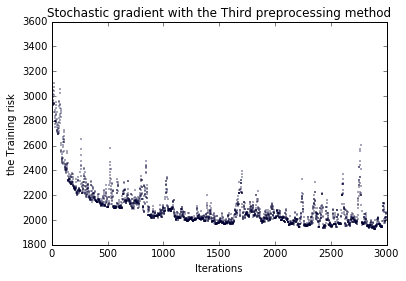

In [392]:
xpos = np.arange(len(training_risk3))+ 1
plt.plot(xpos, training_risk3, 'bo', ms =0.7)
plt.xlabel('Iterations')
plt.ylabel('the Training risk')
plt.title('Stochastic gradient with the Third preprocessing method')
plt.show()

#### Stochastic gradient descent VS Batch gradient descent

It appears that the convergence rate, the speed in which a method converge to the minima, is higher in the batch gradient descent and the batch gradient method guarantees continuous decrease in the training risk. However, the stochastic gradient descent takes shorter time to compute for each step. 

#### Stochastic gradient descent with learning rate decreasing over iterations

In [407]:
def logistic_with_stochastic_gradient_decreasing_stepsize(w,X,y,e,n):
    w_temp = w
    risk = []
    nr.seed(0)
    indice = nr.choice(X.shape[0], n, replace =True)
    for i in np.arange(n):
        risk_temp = R(w_temp,X,y)
        j = indice[i]
        print ('the risk is ', risk_temp ,': iteration ', (i+1))
        w_temp = w_temp + (e/(i+1)) * (y[j]- s(np.dot(X[j,], w_temp)))* X[j,]
        risk = risk + [risk_temp]
    return risk

We run the stochastic gradient descent with learning rate $\frac{1}{t}$ at step $t$ on the first preprocessed data. 

In [434]:
training_risk_1 =logistic_with_stochastic_gradient_decreasing_stepsize(w_0,sp_xtrain1,sp_ytrain,1,3000)

the risk is  3584.95721786 : iteration  1
the risk is  3252.40655651 : iteration  2
the risk is  3292.63860538 : iteration  3
the risk is  3085.89503634 : iteration  4
the risk is  3089.78974106 : iteration  5
the risk is  3109.51461573 : iteration  6
the risk is  3154.79380864 : iteration  7
the risk is  3048.49271007 : iteration  8
the risk is  2969.46275236 : iteration  9
the risk is  2967.25125777 : iteration  10
the risk is  2949.99562319 : iteration  11
the risk is  2951.8960458 : iteration  12
the risk is  2980.84524371 : iteration  13
the risk is  2977.99348608 : iteration  14
the risk is  2977.92216353 : iteration  15
the risk is  2976.82336165 : iteration  16
the risk is  2982.70675854 : iteration  17
the risk is  2980.59906972 : iteration  18
the risk is  2974.74318382 : iteration  19
the risk is  2966.64958389 : iteration  20
the risk is  2963.40535639 : iteration  21
the risk is  2928.76700771 : iteration  22
the risk is  2927.56088854 : iteration  23
the risk is  2926.763

After 3000 iterations, the training risk decreases down to 2518.08163549. We plot the training risk over the number of iterations.

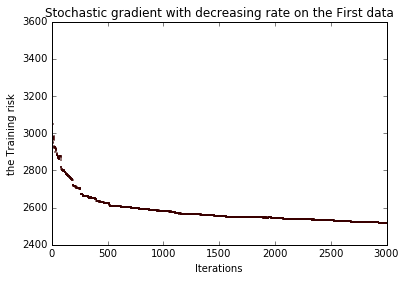

In [435]:
xpos = np.arange(len(training_risk_1))+ 1
plt.plot(xpos, training_risk_1, 'ro', ms =1)
plt.xlabel('Iterations')
plt.ylabel('the Training risk')
plt.title('Stochastic gradient with decreasing rate on the First data')
plt.show()

We run the stochastic gradient descent with the decreasing step size $\frac{1.1}{t}$ at step $t$.

In [455]:
training_risk_2 =logistic_with_stochastic_gradient_decreasing_stepsize(w_0,sp_xtrain2,sp_ytrain,1.1,3000)

the risk is  3584.95721786 : iteration  1
the risk is  124707.212082 : iteration  2
the risk is  124707.212082 : iteration  3
the risk is  124707.212082 : iteration  4
the risk is  124707.212082 : iteration  5
the risk is  124707.212082 : iteration  6
the risk is  124707.212082 : iteration  7
the risk is  91134.397048 : iteration  8
the risk is  91134.397048 : iteration  9
the risk is  91134.397048 : iteration  10
the risk is  65899.9551046 : iteration  11
the risk is  65899.9551046 : iteration  12
the risk is  65899.9551046 : iteration  13
the risk is  65899.9551046 : iteration  14
the risk is  65899.9551046 : iteration  15
the risk is  65899.9551046 : iteration  16
the risk is  49957.5734774 : iteration  17
the risk is  49957.5734774 : iteration  18
the risk is  49957.5734774 : iteration  19
the risk is  49957.5734774 : iteration  20
the risk is  49957.5734774 : iteration  21
the risk is  49957.5734774 : iteration  22
the risk is  49957.5734774 : iteration  23
the risk is  49957.5734

In [457]:
np.amin(training_risk_2)

2404.8189851332536

After 3000 iterations, the training risk decreases down to 2411.97082038 and the smallest risk we obtained is 2404.8189851332536. We plot the training risk over the number of iterations.

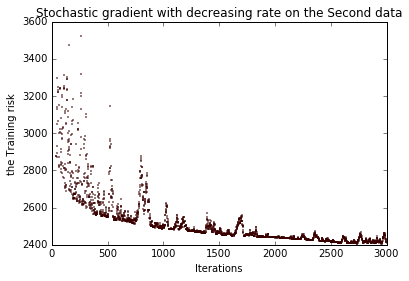

In [460]:
xpos = np.arange(len(training_risk_2))+ 1

plt.plot(xpos, training_risk_2, 'ro', ms =1)
plt.xlabel('Iterations')
plt.ylabel('the Training risk')
plt.title('Stochastic gradient with decreasing rate on the Second data')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,2400,3600))
plt.show()

We run the stochastic gradient descent with decreasing learning rate $\frac{8}{t}$ at step $t$ on the third preprocessed data.

In [473]:
training_risk_3 =logistic_with_stochastic_gradient_decreasing_stepsize(w_0,sp_xtrain3,sp_ytrain,8,3000)

the risk is  3584.95721786 : iteration  1
the risk is  7630.11768245 : iteration  2
the risk is  7632.57883964 : iteration  3
the risk is  7634.56358585 : iteration  4
the risk is  7686.37778253 : iteration  5
the risk is  7754.55048236 : iteration  6
the risk is  7755.60365454 : iteration  7
the risk is  4867.83373023 : iteration  8
the risk is  5108.06361153 : iteration  9
the risk is  5109.29759209 : iteration  10
the risk is  3928.76723755 : iteration  11
the risk is  3993.73069164 : iteration  12
the risk is  3998.25388454 : iteration  13
the risk is  4046.87853921 : iteration  14
the risk is  4056.59256502 : iteration  15
the risk is  4057.69071289 : iteration  16
the risk is  3638.55055255 : iteration  17
the risk is  3639.86729894 : iteration  18
the risk is  3675.36510593 : iteration  19
the risk is  3676.41449269 : iteration  20
the risk is  4122.11430793 : iteration  21
the risk is  4200.39539916 : iteration  22
the risk is  4232.40003714 : iteration  23
the risk is  4262.45

After 3000 iterations, the training risk decreases down to 2301. We plot the training risk over the number of iterations.

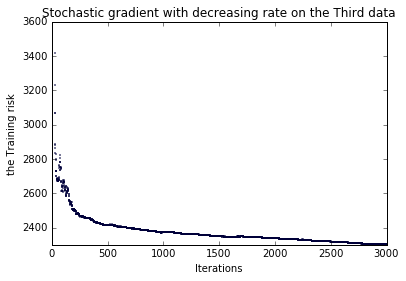

In [474]:
xpos = np.arange(len(training_risk_3))+ 1

plt.plot(xpos, training_risk_3, 'bo', ms =1)
plt.xlabel('Iterations')
plt.ylabel('the Training risk')
plt.title('Stochastic gradient with decreasing rate on the Third data')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,2300,3600))
plt.show()

#### Is this strategy better than having a constant $\epsilon$?

With the constant step size(learning rate), the stochastic gradient produces lower training risk after the same number of iterations. This could be predictable in that the step size gets too small too fast when we use decreasing learning rates and therefore could not approach to the minimum as much as the stochastic gradient descent with constant step size does. It is worth to mention that the graph of training risk is much smoother curve with decreasing learning rate than with constant learning rate.

#### kernel logistic regression with a polynomial kernel of degree 2

In [19]:
nr.seed(0)
valid = nr.choice(sp_xtrain3.shape[0], sp_xtrain3.shape[0]//3, replace =False)
sp_xvalid = sp_xtrain3[valid, ]
sp_xtrain0 = sp_xtrain3[np.array([i not in valid for i in np.arange(sp_xtrain3.shape[0])]) ,:] 
sp_yvalid = sp_ytrain[valid]
sp_ytrain0 = sp_ytrain[np.array([i not in valid for i in np.arange(sp_xtrain3.shape[0])])]

In [45]:
sp_xtrain0.shape
sp_xvalid.shape

(1724, 33)

In [12]:
def quadratic_K(rho, X_train, X_test):
    return np.square(np.dot(X_train, np.transpose(X_test)) + rho)

In [13]:
kf_ = KFold(3448, n_folds=10)

In [10]:
# Risk function
def R_(a, y_test, K):
    temp = np.dot(K,a)
    one = np.linspace(1,1, len(y_test))
    return np.dot(np.transpose(1- y_test),temp) + np.dot(one, np.log(1+ np.exp(-temp))) 

def stochastic_gradient_kernel(a,X,y, rho,e, lamda,n, K_):
    K__ = K_(rho,X, X)
    a_temp = a
    risk = []
    nr.seed(0)
    indice = nr.choice(X.shape[0], n, replace = True)
    for i in np.arange(n):
        # risk_temp = R_(a_temp, X, y, K)
        j = indice[i]
        # print ('the risk is ', risk_temp ,': iteration ', (i+1))
        b = lamda * a_temp 
        b[j] = b[j] - y[j] + s(np.dot(K__[j,], a_temp))
        a_temp = a_temp - e * b
        # risk = risk + [risk_temp]
    return a_temp

def tenfold_cv_(rho, e, lamda, n, K_):
    R = 0
    for train_index, test_index in kf_:
        X_train, X_test = sp_xtrain0[train_index, :], sp_xtrain0[test_index, :]
        y_train, y_test = sp_ytrain0[train_index], sp_ytrain0[test_index]
        a0 = np.zeros(X_train.shape[0])
        a = stochastic_gradient_kernel(a0,X_train,y_train, rho,e, lamda,n, K_)
        temp = np.dot(a, np.square( np.dot(X_train, np.transpose(X_test))+ rho)) 
        one = np.linspace(1,1, len(y_test))
        R = R + np.dot(np.transpose(1- y_test),temp) + np.dot(one, np.log(1+ np.exp(-temp))) 
    return R/10

In [94]:
tenfold_cv_(0, 1e-5, 1e-3, 500, quadratic_K)

238.81979676288202

In [95]:
tenfold_cv_(1e-3, 1e-5, 1e-3, 500, quadratic_K)

238.81964581654387

In [96]:
tenfold_cv_(1e-1, 1e-5, 1e-3, 500, quadratic_K)

238.80433972893556

In [97]:
tenfold_cv_(1e-2, 1e-5, 1e-3, 500, quadratic_K)

238.81828400128205

In [98]:
tenfold_cv_(1, 1e-5, 1e-3, 500, quadratic_K)

238.6327606396122

In [99]:
tenfold_cv_(10, 1e-5, 1e-3, 500, quadratic_K)

234.76740849818816

In [100]:
tenfold_cv_(20, 1e-5, 1e-3, 500, quadratic_K)

232.1178878996912

In [101]:
tenfold_cv_(30, 1e-5, 1e-3, 500, quadratic_K)

235.93093307801436

In [102]:
tenfold_cv_(18, 1e-5, 1e-3, 500, quadratic_K)

232.13978447133462

In [103]:
tenfold_cv_(19, 1e-5, 1e-3, 500, quadratic_K)

232.09213791761448

10-fold cross validation shows that average training risk is the lowest when $\rho = 19$.

In [11]:
def stochastic_gradient_kernel_print(X_train, X_test,  y_train, y_test, rho,e, lamda,n, K_):
    K1 = K_(rho,X_train,X_train)
    K2 = K_(rho, X_train, X_test)
    risk = []
    nr.seed(0)
    indice = nr.choice(X_train.shape[0], n, replace = True)
    a0 = np.zeros(X_train.shape[0])
    temp = np.dot(a0, K2)
    one = np.linspace(1,1, len(y_test))
    a_temp = a0
    for i in np.arange(n):
        risk_temp = np.dot(np.transpose(1- y_test),temp) + np.dot(one, np.log(1+ np.exp(-temp))) 
        j = indice[i]
        print ('the risk is ', risk_temp ,': iteration ', (i+1))
        b = lamda * a_temp 
        diff = y_train[j] - s(np.dot(a_temp,K1[j, ]))
        b[j] = b[j] - diff
        a_temp = a_temp - e * b
        temp = (1-e * lamda) * temp + e * diff * K2[j, ] 
        risk = risk + [risk_temp]
    return [risk, a_temp]

In [87]:
training_risk_kernel = stochastic_gradient_kernel_print(sp_xtrain0, sp_xtrain0,
                                                        sp_ytrain0,sp_ytrain0, 19, 1e-5, 1e-3, 30000, quadratic_K)

the risk is  2389.97147857 : iteration  1
the risk is  2388.50723823 : iteration  2
the risk is  2386.91925433 : iteration  3
the risk is  2385.37438057 : iteration  4
the risk is  2383.98065696 : iteration  5
the risk is  2385.3855362 : iteration  6
the risk is  2386.7790168 : iteration  7
the risk is  2385.25283763 : iteration  8
the risk is  2383.78251136 : iteration  9
the risk is  2382.38667382 : iteration  10
the risk is  2383.79471226 : iteration  11
the risk is  2382.27707668 : iteration  12
the risk is  2380.88604362 : iteration  13
the risk is  2379.4186275 : iteration  14
the risk is  2378.00834721 : iteration  15
the risk is  2376.59352589 : iteration  16
the risk is  2375.13283161 : iteration  17
the risk is  2376.61721177 : iteration  18
the risk is  2375.10990181 : iteration  19
the risk is  2373.63930693 : iteration  20
the risk is  2372.15329152 : iteration  21
the risk is  2370.79617213 : iteration  22
the risk is  2369.43802987 : iteration  23
the risk is  2370.82710

 After the 30000 iteration, we achieve the lowest training risk 1733.59507488. We plot the training  risk over the number of iterations.

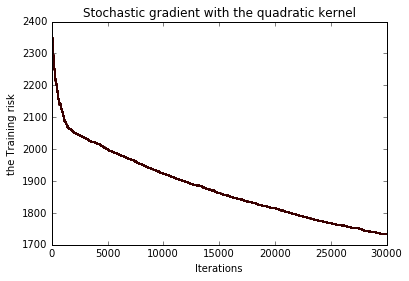

In [88]:
xpos = np.arange(len(training_risk_kernel[0]))+ 1

plt.plot(xpos, training_risk_kernel[0], 'ro', ms =1)
plt.xlabel('Iterations')
plt.ylabel('the Training risk')
plt.title('Stochastic gradient with the quadratic kernel')

plt.show()

In [90]:
validation_risk_kernel = stochastic_gradient_kernel_print(sp_xtrain0, sp_xvalid, sp_ytrain0, 
                                                        sp_yvalid, 19, 1e-5, 1e-3, 30000, quadratic_K)

the risk is  1194.98573929 : iteration  1
the risk is  1194.20773155 : iteration  2
the risk is  1193.36570734 : iteration  3
the risk is  1192.55076004 : iteration  4
the risk is  1191.80927024 : iteration  5
the risk is  1192.55777194 : iteration  6
the risk is  1193.30053708 : iteration  7
the risk is  1192.48966295 : iteration  8
the risk is  1191.70459066 : iteration  9
the risk is  1190.96184941 : iteration  10
the risk is  1191.7099116 : iteration  11
the risk is  1190.90356364 : iteration  12
the risk is  1190.16327242 : iteration  13
the risk is  1189.3846922 : iteration  14
the risk is  1188.63467339 : iteration  15
the risk is  1187.88011407 : iteration  16
the risk is  1187.10411683 : iteration  17
the risk is  1187.89314283 : iteration  18
the risk is  1187.09505982 : iteration  19
the risk is  1186.31956597 : iteration  20
the risk is  1185.5250791 : iteration  21
the risk is  1184.80206725 : iteration  22
the risk is  1184.07914126 : iteration  23
the risk is  1184.81928

The validataion risk, which intially was 1194.9857, decreases down to 848.848799934 after 30000 iterations.

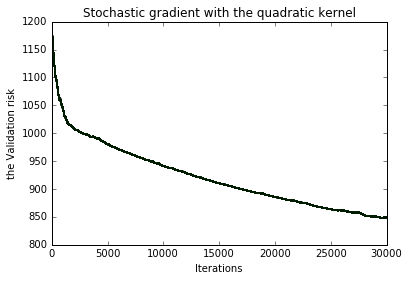

In [91]:
xpos = np.arange(len(validation_risk_kernel[0]))+ 1

plt.plot(xpos, validation_risk_kernel[0], 'go', ms =1)
plt.xlabel('Iterations')
plt.ylabel('the Validation risk')
plt.title('Stochastic gradient with the quadratic kernel')

plt.show()

#### Repeat the same experiment with the linear kernel $k(x; z) = x^\top z + \rho$.

In [92]:
# define the linear kernel function

def linear_K(rho, X_train, X_test):
    return np.dot(X_train, np.transpose(X_test)) + rho

#### 10-fold Cross Validation

In [104]:
tenfold_cv_(0, 1e-5, 1e-3, 500, linear_K)

238.81973628796601

In [105]:
tenfold_cv_(1, 1e-5, 1e-3, 500, linear_K)

238.63221702134652

In [106]:
tenfold_cv_(20, 1e-5, 1e-3, 500, linear_K)

232.59098370465694

In [107]:
tenfold_cv_(10, 1e-5, 1e-3, 500, linear_K)

234.53067277148665

In [108]:
tenfold_cv_(30, 1e-5, 1e-3, 500, linear_K)

252.04620848751625

In [109]:
tenfold_cv_(19, 1e-5, 1e-3, 500, linear_K)

232.18632045192498

In [110]:
tenfold_cv_(18, 1e-5, 1e-3, 500, linear_K)

231.97186548732543

In [111]:
tenfold_cv_(15, 1e-5, 1e-3, 500, linear_K)

232.2471268876871

In [112]:
tenfold_cv_(16, 1e-5, 1e-3, 500, linear_K)

232.02402140148493

In [113]:
tenfold_cv_(17, 1e-5, 1e-3, 500, linear_K)

231.92511545177331

It is when $\rho = 17$ that the 10-fold cross validation records the lowest average risk.

In [116]:
training_risk_kernel_linear = stochastic_gradient_kernel_print(sp_xtrain0, sp_xtrain0,
                                                        sp_ytrain0,sp_ytrain0, 17, 1e-5, 1e-3, 30000, linear_K)

the risk is  2389.97147857 : iteration  1
the risk is  2389.90650462 : iteration  2
the risk is  2389.8385066 : iteration  3
the risk is  2389.77134939 : iteration  4
the risk is  2389.70773888 : iteration  5
the risk is  2389.77139251 : iteration  6
the risk is  2389.83472035 : iteration  7
the risk is  2389.76799327 : iteration  8
the risk is  2389.70251425 : iteration  9
the risk is  2389.63874838 : iteration  10
the risk is  2389.70253505 : iteration  11
the risk is  2389.6357788 : iteration  12
the risk is  2389.57202282 : iteration  13
the risk is  2389.50624651 : iteration  14
the risk is  2389.4417862 : iteration  15
the risk is  2389.37710109 : iteration  16
the risk is  2389.31116399 : iteration  17
the risk is  2389.37715804 : iteration  18
the risk is  2389.3100696 : iteration  19
the risk is  2389.24373855 : iteration  20
the risk is  2389.17696497 : iteration  21
the risk is  2389.11327866 : iteration  22
the risk is  2389.04945504 : iteration  23
the risk is  2389.113208

After 30000 iterations, the training risk decreases down to 2099.345999 in logistic ridge regression with the linear kernel. We plot the training risk over the number of iterations.

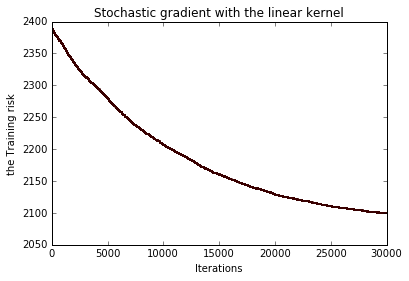

In [119]:
xpos = np.arange(len(training_risk_kernel_linear[0]))+ 1

plt.plot(xpos, training_risk_kernel_linear[0], 'ro', ms =1)
plt.xlabel('Iterations')
plt.ylabel('the Training risk')
plt.title('Stochastic gradient with the linear kernel')

plt.show()

#### Validation risk 

In [118]:
validation_risk_kernel_linear = stochastic_gradient_kernel_print(sp_xtrain0, sp_xvalid,
                                                        sp_ytrain0,sp_yvalid, 19, 1e-5, 1e-3, 30000, linear_K)

the risk is  1194.98573929 : iteration  1
the risk is  1194.94743648 : iteration  2
the risk is  1194.90757046 : iteration  3
the risk is  1194.86825616 : iteration  4
the risk is  1194.83066519 : iteration  5
the risk is  1194.86830714 : iteration  6
the risk is  1194.90578659 : iteration  7
the risk is  1194.86656239 : iteration  8
the risk is  1194.82790979 : iteration  9
the risk is  1194.7902374 : iteration  10
the risk is  1194.82789426 : iteration  11
the risk is  1194.78866059 : iteration  12
the risk is  1194.75099442 : iteration  13
the risk is  1194.71231574 : iteration  14
the risk is  1194.67429501 : iteration  15
the risk is  1194.63610571 : iteration  16
the risk is  1194.59732933 : iteration  17
the risk is  1194.63613803 : iteration  18
the risk is  1194.59681978 : iteration  19
the risk is  1194.55797521 : iteration  20
the risk is  1194.5186396 : iteration  21
the risk is  1194.48101718 : iteration  22
the risk is  1194.44334113 : iteration  23
the risk is  1194.4810

The validation risk, which initially was 1194.9857, decreases down to 1032.38697. We plot the validation risk over the number of iterations.

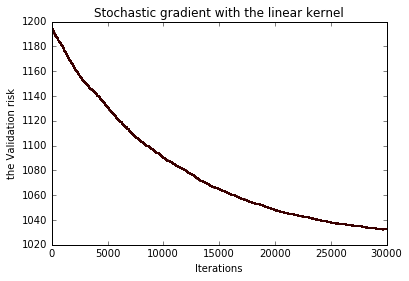

In [121]:
xpos = np.arange(len(validation_risk_kernel_linear[0]))+ 1

plt.plot(xpos, validation_risk_kernel_linear[0], 'ro', ms =1)
plt.xlabel('Iterations')
plt.ylabel('the Validation risk')
plt.title('Stochastic gradient with the linear kernel')

plt.show()

#### Does the quadratic kernel overfit the data?

According to the validation risk, the quadratic kernel does not appear to overfit the data. It gives lower validation risk than the linear kernel and the propotions of numbers of data and the total risk are almost the same in the validation risk and the training risk. 

#### For each kernel, should you decrease or increase  $\lambda $ to try to improve performance?

In [123]:
tenfold_cv_(17, 1e-5, 1e-3, 500, linear_K)

231.92511545177331

In [126]:
tenfold_cv_(17, 1e-5, 1e-2, 500, linear_K)

231.92515041100859

In [128]:
tenfold_cv_(17, 1e-5, 1, 500, linear_K)

231.92902977056451

In [130]:
tenfold_cv_(17, 1e-5, 10, 500, linear_K)

231.96726038354353

In [132]:
tenfold_cv_(17, 1e-5, 1e-5, 500, linear_K)

231.92511160659714

In [133]:
tenfold_cv_(19, 1e-5, 1e-5, 500, quadratic_K)

232.09213334165784

In [134]:
tenfold_cv_(19, 1e-5, 1e-3, 500, quadratic_K)

232.09213791761448

In [135]:
tenfold_cv_(19, 1e-5, 1e-1, 500, quadratic_K)

232.09259575993278

In [137]:
tenfold_cv_(19, 1e-5, 10, 500, quadratic_K)

232.14075190405794

In [138]:
tenfold_cv_(19, 1e-5, 100, 500, quadratic_K)

232.72369887001486

We tried several different $\lambda$ values in cross validation to see if they can improve performance. There was no noticeable decrease in the training risk compared to the training risk when $\lambda$ is $10^{-3}$. This implies that there is no need to decrease or increase $\lambda$ to improve performance.

#### Kaggle 

Based on training risks, or empirical risks, of each classifier, the best classifier is the logistic regression with batch gradient descent along with the third preprocessed data. We submitted the predicted labels to Kaggle that is derived by the best classifier, and the kaggle score was 0.78231.

In [35]:
empirical_risk = logistic_with_batch_gradient(w_0, sp_xtrain3, sp_ytrain, 2e-3, 20000)

the risk is  3584.95721786 : iteration  1
the risk is  4106.32058967 : iteration  2
the risk is  3197.9220317 : iteration  3
the risk is  3967.10472524 : iteration  4
the risk is  2682.77707914 : iteration  5
the risk is  2754.18057516 : iteration  6
the risk is  2463.95894291 : iteration  7
the risk is  2417.07294157 : iteration  8
the risk is  2271.68299745 : iteration  9
the risk is  2223.3775302 : iteration  10
the risk is  2155.00067837 : iteration  11
the risk is  2123.86911517 : iteration  12
the risk is  2089.30249473 : iteration  13
the risk is  2069.74877244 : iteration  14
the risk is  2050.14159893 : iteration  15
the risk is  2037.07824844 : iteration  16
the risk is  2024.64782528 : iteration  17
the risk is  2015.31136188 : iteration  18
the risk is  2006.66649052 : iteration  19
the risk is  1999.60404597 : iteration  20
the risk is  1993.12895398 : iteration  21
the risk is  1987.52734896 : iteration  22
the risk is  1982.38003115 : iteration  23
the risk is  1977.7524

In [41]:
temp = np.dot(sp_test, empirical_risk[1])
prob = s(temp)
sp_ytest = prob >= 1/2
sp_ypred = np.asarray([[i+1, sp_ytest[i]] for i in np.arange(5857)])
np.savetxt('sp_ytest2.csv', sp_ypred, fmt = '%1.u' , delimiter = ',', header = 'Id,Category',comments='')

### Problem 4: Revisiting Logistic Regression

Recall that in logistic regression, the logistic function, $s(z) = \frac{1}{1+e^{-􀀀z}}$ , is used to map output
values between $[0, 1]$. Consider the function $g(z) = \frac{\tanh(z)+1}{2}$, where $\tanh (z) = 2s(2z)-1$, that also
maps outputs between $[0, 1]$. In this problem, we will explore using $g(z)$ instead of the logistic function in logistic regression.

$$
g(z) = \frac{\tanh(z)+1}{2} = \frac{2s(2z)}{2} = \frac{2}{2+2e^{-2z}} = \frac{1}{2} + \frac{1-e^{-2z}}{2+2e^{-2z}} = \frac{1}{2} + \frac{e^{z} - e^{-z}}{2(e^{z}+ e^{-z})}.
$$
and
$$
g'(z) =\frac{dg(z)}{dz} = \frac{2(e^{z} + e^{-z})(e^{z} + e^{-z})- 2(e^{z} - e^{-z})^2}{4(e^{z} + e^{-z})^2}
= \frac{1}{2} - \frac{\tanh(z)^2}{2}
$$
The appropriate batch gradient ascent update function is
\begin{align*}
w &\leftarrow w - \lambda \nabla J(w) \\
& = w - \lambda \sum_{i=1}^n (\frac{y_i g'(X_i\cdot w)}{g(X_i \cdot w) }-\frac{(1-y_i) g'(X_i\cdot w)}{1-g(X_i \cdot w)})\, X_i \\
& = w- \lambda \sum_{i=1}^n (\frac{y_i (\frac{1}{2} - \frac{\tanh^2(X_i\cdot w)}{2})}{\frac{\tanh(X_i\cdot w)+1}{2}}- \frac{(1-y_i) (\frac{1}{2} - \frac{\tanh^2(X_i\cdot w)}{2})}{1- \frac{\tanh(X_i\cdot w)+1}{2}} ) \, X_i\\
& = w  - \lambda \sum_{i=1}^n (2y_i -1 - \tanh(X_i \cdot w)) X_i
\end{align*}

### Problem 5: Real World Spam Classification

Linear SVM can not utilize the new feature as he desired, because the spams usually are sent around midnight and number of milliseconds since the previous midnight are concentrated in either (0, t] or [86400000 -t ,86400000) for small $t$ and linear SVM can not classify wheter this new feature is either in one of the two intervals (0, t] and [86400000 -t ,86400000) or not. Therefore in order to classify the feature correctly with linear SVM, Daniel may want to try one of following methods:
1. introduce the new feature as the number of milliseconds since the previous noon, rather than since the previous midnight so that the time around midnight could have continous possible values,
2. use quadratic kernel instead of linear kernel so that the linear SVM can classify wheter the new feature is either in one of the two intervals (0, t] and [86400000 -t ,86400000) or not.

